In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Num GPUs Available:  1


# Preprocessing.

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
root_dir = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/'
directory = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/'
try:
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Train')
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Valid/')
except:
    print('Already Created')

Already Created


In [4]:
classes = os.listdir(directory)
num_classes = len(classes)
print(f'{classes},\n number: {num_classes}')

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'],
 number: 43


In [5]:
source_path=[directory +f'{a}' for a in classes]
print(source_path)

['Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/0', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/1', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/10', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/11', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/12', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/13', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/14', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/15', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/16', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/17', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/18', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/19', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/2', 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Train/20', 'Dataset

In [6]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['0_dir',
 '1_dir',
 '10_dir',
 '11_dir',
 '12_dir',
 '13_dir',
 '14_dir',
 '15_dir',
 '16_dir',
 '17_dir',
 '18_dir',
 '19_dir',
 '2_dir',
 '20_dir',
 '21_dir',
 '22_dir',
 '23_dir',
 '24_dir',
 '25_dir',
 '26_dir',
 '27_dir',
 '28_dir',
 '29_dir',
 '3_dir',
 '30_dir',
 '31_dir',
 '32_dir',
 '33_dir',
 '34_dir',
 '35_dir',
 '36_dir',
 '37_dir',
 '38_dir',
 '39_dir',
 '4_dir',
 '40_dir',
 '41_dir',
 '42_dir',
 '5_dir',
 '6_dir',
 '7_dir',
 '8_dir',
 '9_dir']

In [7]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

0_dir :  210
1_dir :  2220
10_dir :  2010
11_dir :  1320
12_dir :  2100
13_dir :  2160
14_dir :  780
15_dir :  630
16_dir :  420
17_dir :  1110
18_dir :  1200
19_dir :  210
2_dir :  2250
20_dir :  360
21_dir :  330
22_dir :  390
23_dir :  510
24_dir :  270
25_dir :  1500
26_dir :  600
27_dir :  240
28_dir :  540
29_dir :  270
3_dir :  1410
30_dir :  450
31_dir :  780
32_dir :  240
33_dir :  689
34_dir :  420
35_dir :  1200
36_dir :  390
37_dir :  210
38_dir :  2070
39_dir :  300
4_dir :  1980
40_dir :  360
41_dir :  240
42_dir :  240
5_dir :  1860
6_dir :  420
7_dir :  1440
8_dir :  1410
9_dir :  1470


In [8]:
train = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Train'
valid = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Valid'

In [9]:
import glob
from sklearn.model_selection import train_test_split

def split(data_path, train, validation, split_size=0.1):
    folders = os.listdir(data_path)
    for folder in folders:
        fullpath = os.path.join(data_path, folder)
        image = glob.glob(os.path.join(fullpath,'*.png'))
       
        X_train, X_valid = train_test_split(image, test_size = split_size)
       
        for x in X_train:
         #   print(x)
            path_to_folder = os.path.join(train,folder)
           
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(x,path_to_folder)
       
        for y in X_valid:
            path_to_folder = os.path.join(validation, folder)
            if not os.path.isdir(path_to_folder):
                os.makedirs(path_to_folder)
            shutil.copy(y, path_to_folder)

In [10]:
#Commented to not run again
#split(directory, train=train,validation=valid,split_size = 0.2)

In [11]:
import pandas as pd

df = pd.read_csv("Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv")
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [12]:
target = df['ClassId']

In [13]:
try:
    os.makedirs('Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Test/')
except:
    print('Already Created')

Already Created


In [14]:
test = 'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Test/'

In [15]:
root_dir

'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/'

In [16]:
def prepare_test(csv_path, src, dst):
    with open(csv_path, "r") as f:
        next(f)
        for line in f:
            split_line = line.split(',')
            image = split_line[-1][:-1]
            label = split_line[-2]
            #print(image, label)
            destination = dst + label
            if not os.path.isdir(destination):
                os.makedirs(destination)
            shutil.copy(src + image,destination)

In [17]:
csv_path = "Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Test.csv"
src = root_dir
dst = test
#Commented to not run again
#prepare_test(csv_path, src, dst)

# Modeling

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAvgPool2D, Dropout, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras import Model

In [327]:
width, height = 60, 60
batch_size = 64
# num_classes

In [328]:
classes_indices = ['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42']

In [329]:
train_generator = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    rescale=1/255,
    data_format='channels_last',
    dtype=tf.float32)

train_generator = train_generator.flow_from_directory(
    directory=train,
    target_size=(height, width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    classes=classes_indices 
)

valid_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32)
valid_generator = valid_generator.flow_from_directory(
    directory=valid,
    target_size=(height, width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    classes=classes_indices 
)

test_generator = ImageDataGenerator(rescale=1/255, dtype=tf.float32)
test_generator = test_generator.flow_from_directory(
    directory=test,
    target_size=(height, width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    classes=classes_indices 
)

Found 31367 images belonging to 43 classes.
Found 7842 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


In [266]:
# Lets setup a default layer, 
import tensorflow

class ConvBlock(tensorflow.keras.layers.Layer):
    def __init__(self, channels):
        super().__init__()
        self.channels = channels
        
    def build(self, input_shape):
        self.main_layers=[
            Conv2D(self.channels[0], 3, padding="same", activation='relu', input_shape=input_shape),
            Conv2D(self.channels[0], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.2),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            Conv2D(self.channels[1], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            Conv2D(self.channels[2], 3, padding="same", activation='relu'),
            MaxPooling2D(2),
            Dropout(0.3)
        ]

    def call(self, inputs):
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        return x

In [292]:
class FullModel(tensorflow.keras.Model):
    def __init__(self, channels, num_classes=43):
        super().__init__()
        self.conv_block = ConvBlock(channels)
        self.drop = Dropout(0.3)
        self.dense1 = Dense(512, activation = 'relu')
        self.dense2 = Dense(256, activation = 'relu')
        self.global_pool = GlobalAvgPool2D()
        self.classifier = Dense(num_classes, activation='softmax')
        self.flat = Flatten()
        self.conv_layer = Conv2D(256, 3, activation='relu', padding="valid")
        self.BN = BatchNormalization()
        self.pool = MaxPooling2D()
        
    def call(self, inputs):
        x = self.conv_block(inputs)
        x = self.flat(x)
        x = self.dense1(x)
        x = self.drop(x)
        x = self.dense2(x)
        return self.classifier(x)
    
    def summary(self):
        x = Input(shape=(60, 60, 3))
        model = Model(inputs=[x], outputs=self.call(x))
        return model.summary()

In [293]:
channels = [32, 64, 128]
model = FullModel(channels, num_classes)

In [294]:
loss = tensorflow.keras.losses.CategoricalCrossentropy()

model.compile(optimizer='adam',
    loss=loss,
    metrics=['accuracy'])

In [295]:
import warnings
warnings.filterwarnings('ignore')

tf.keras.backend.clear_session()

In [296]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
conv_block (ConvBlock)       (None, 7, 7, 128)         287008    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 43)                11051 

In [297]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
cb = [tensorflow.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15,
                    callbacks=cb
)

Epoch 1/15
490/490 [==============================] - 27s 53ms/step - loss: 1.9053 - accuracy: 0.4414 - val_loss: 0.3285 - val_accuracy: 0.9068
Epoch 2/15
490/490 [==============================] - 25s 52ms/step - loss: 0.2608 - accuracy: 0.9162 - val_loss: 0.0820 - val_accuracy: 0.9766
Epoch 3/15
490/490 [==============================] - 26s 52ms/step - loss: 0.1199 - accuracy: 0.9620 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 4/15
490/490 [==============================] - 26s 54ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 5/15
490/490 [==============================] - 26s 54ms/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 0.0301 - val_accuracy: 0.9922
Epoch 6/15
490/490 [==============================] - 26s 54ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0236 - val_accuracy: 0.9945
Epoch 7/15
490/490 [==============================] - 26s 54ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0231 - val_accuracy:

In [298]:
model.evaluate_generator(valid_generator,
                             steps=STEP_SIZE_VALID,
                             verbose=1)

122/122 [==============================] - 5s 41ms/step - loss: 0.0209 - accuracy: 0.9949


[0.020854052156209946, 0.9948770403862]

In [299]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
model.evaluate_generator(test_generator,
                             steps=STEP_SIZE_TEST,
                             verbose=1)

197/197 [==============================] - 8s 41ms/step - loss: 0.1211 - accuracy: 0.9734


[0.12111938744783401, 0.9733502268791199]

In [300]:
test_generator.reset()
Y_pred = model.predict_generator(test_generator)
y_pred2 = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred2 = np.argmax(y_pred2, axis=1)

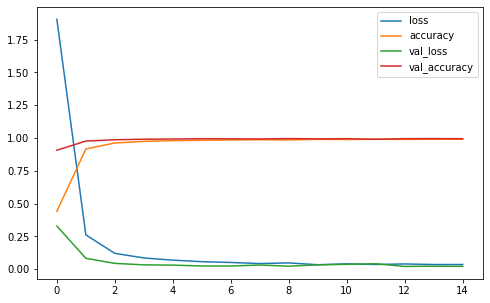

In [301]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [302]:
y_pred

array([ 0,  0,  0, ..., 42, 41, 42], dtype=int64)

In [303]:
y_pred2

array([ 0,  0,  0, ..., 42, 41, 42], dtype=int64)

In [304]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

In [305]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":y_pred2})

In [306]:
results

,Filename,Predictions
0,0\00243.png,0
1,0\00252.png,0
2,0\00403.png,0
3,0\00579.png,0
4,0\00675.png,0
...,...,...
12625,42\11842.png,42
12626,42\12019.png,42
12627,42\12098.png,42
12628,42\12276.png,41


In [308]:
image_path = 'Datasets\GTSRB - German Traffic Sign Recognition Benchmark\Meta\42.png'

In [311]:
import cv2


ModuleNotFoundError: No module named 'cv2'

In [309]:
model.predict(image)

IndexError: list index out of range

In [313]:
save_dir=test+'idontknow'

In [314]:
save_dir

'Datasets/GTSRB - German Traffic Sign Recognition Benchmark/Working/Test/idontknow'

Class: 2


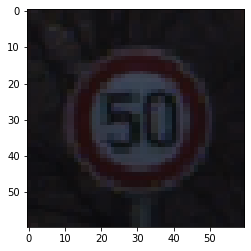

In [343]:
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

image, label = next(test_generator)  
print(f'Class: {np.argmax(label[0])}') 

plt.imshow(image[0])   # shows the first image